### ETL - Workflow 
DataSet : Bank Customer Churn Prediction Dataset.

In [59]:
import pandas as pd 
import numpy as np

#### 1. Extract

In [60]:
#loading dataset
data = pd.read_csv("insurance.csv")

print(data.shape)
print(data.columns)
print(data.dtypes)

(1338, 7)
Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')
age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object


In [61]:
print(data.head())
print(data.tail())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
      age     sex    bmi  children smoker     region     charges
1333   50    male  30.97         3     no  northwest  10600.5483
1334   18  female  31.92         0     no  northeast   2205.9808
1335   18  female  36.85         0     no  southeast   1629.8335
1336   21  female  25.80         0     no  southwest   2007.9450
1337   61  female  29.07         0    yes  northwest  29141.3603


In [62]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None


### 2. Transform

In [63]:
## finding null values of each column

data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [64]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [66]:
data.shape

(1338, 7)

In [67]:
data.drop_duplicates(inplace=True)


In [68]:
data.shape

(1337, 7)

In [69]:
import seaborn as sns


<Axes: xlabel='bmi'>

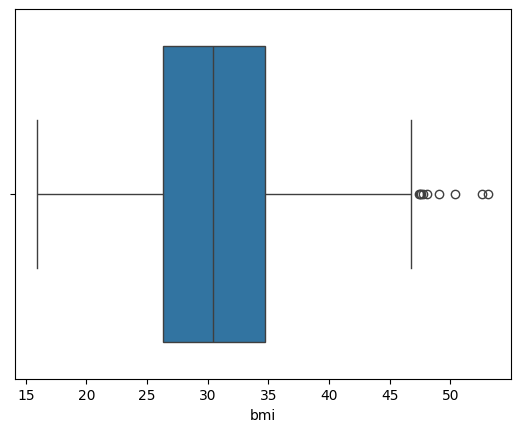

In [70]:
sns.boxplot(x="bmi", data = data)

In [71]:
## removing outliers with z-score

from scipy import stats
import numpy as np

# Calculate Z-scores
z = np.abs(stats.zscore(data["bmi"]))

# Keep only values with z < 3
data = data[z < 3]

data.shape ## from (1337,7) to (1333 , 7)


(1333, 7)

In [72]:
z2 = np.abs(stats.zscore(data["charges"]))
data = data[z2 < 3]

data.shape

(1325, 7)

In [73]:
data.columns


Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

<Axes: xlabel='bmi'>

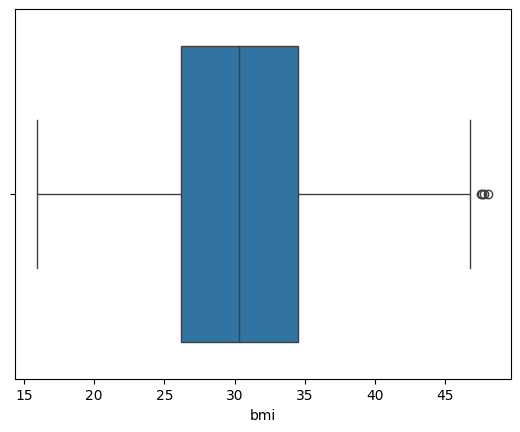

In [74]:
sns.boxplot(x=data["bmi"])
#much clear box plot

In [75]:
## ENCODING - CATEGORICAL VARIABLES

data['sex'].unique()

array(['female', 'male'], dtype=object)

In [76]:
data['sex'].shape

(1325,)

In [77]:
dd = pd.get_dummies(data["sex"],dtype=int , prefix = "Gen" , drop_first=True)

In [78]:
data=  pd.concat([data,dd] , axis=1).drop(["sex"],axis=1)


In [79]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1325 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1325 non-null   int64  
 1   bmi       1325 non-null   float64
 2   children  1325 non-null   int64  
 3   smoker    1325 non-null   object 
 4   region    1325 non-null   object 
 5   charges   1325 non-null   float64
 6   Gen_male  1325 non-null   int64  
dtypes: float64(2), int64(3), object(2)
memory usage: 82.8+ KB


In [80]:
# 2 smoker

d2 = pd.get_dummies(data['smoker'] , dtype = int , drop_first=True , prefix = "Smoke" )

In [81]:
data=  pd.concat([data,d2] , axis=1).drop(["smoker"],axis=1)


In [82]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1325 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        1325 non-null   int64  
 1   bmi        1325 non-null   float64
 2   children   1325 non-null   int64  
 3   region     1325 non-null   object 
 4   charges    1325 non-null   float64
 5   Gen_male   1325 non-null   int64  
 6   Smoke_yes  1325 non-null   int64  
dtypes: float64(2), int64(4), object(1)
memory usage: 82.8+ KB


In [83]:
d3 = pd.get_dummies(data['region'] , prefix = "Reg" , drop_first = True , dtype = int)
data=  pd.concat([data,d3] , axis=1).drop(["region"],axis=1)


In [84]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1325 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            1325 non-null   int64  
 1   bmi            1325 non-null   float64
 2   children       1325 non-null   int64  
 3   charges        1325 non-null   float64
 4   Gen_male       1325 non-null   int64  
 5   Smoke_yes      1325 non-null   int64  
 6   Reg_northwest  1325 non-null   int64  
 7   Reg_southeast  1325 non-null   int64  
 8   Reg_southwest  1325 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 103.5 KB


In [87]:
## FEATURE ENGINEERING

data["smoker_age_interaction"] = data["Smoke_yes"] * data["age"]


In [88]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1325 entries, 0 to 1337
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     1325 non-null   int64  
 1   bmi                     1325 non-null   float64
 2   children                1325 non-null   int64  
 3   charges                 1325 non-null   float64
 4   Gen_male                1325 non-null   int64  
 5   Smoke_yes               1325 non-null   int64  
 6   Reg_northwest           1325 non-null   int64  
 7   Reg_southeast           1325 non-null   int64  
 8   Reg_southwest           1325 non-null   int64  
 9   smoker_age_interaction  1325 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 113.9 KB


In [89]:
data

,age,bmi,children,charges,Gen_male,Smoke_yes,Reg_northwest,Reg_southeast,Reg_southwest,smoker_age_interaction
0,19,27.900,0,16884.92400,0,1,0,0,1,19
1,18,33.770,1,1725.55230,1,0,0,1,0,0
2,28,33.000,3,4449.46200,1,0,0,1,0,0
3,33,22.705,0,21984.47061,1,0,1,0,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,0,1,0,0,0
1334,18,31.920,0,2205.98080,0,0,0,0,0,0
1335,18,36.850,0,1629.83350,0,0,0,1,0,0
1336,21,25.800,0,2007.94500,0,0,0,0,1,0


In [90]:
## has_children
data["has_children"] = (data["children"] > 0).astype(int)


### 3 . Load 
Saving pre processed data to new .CSV file

In [91]:
data.to_csv("full_clean_dataset.csv", index=False)